2.8. Итоговое задание
Вас пригласили поучаствовать в одном из проектов UNICEF — международного подразделения ООН, чья миссия состоит в повышении уровня благополучия детей по всему миру.

Суть проекта — отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

И сделать это можно с помощью модели, которая предсказывала бы результаты госэкзамена по математике для каждого ученика школы (вот она, сила ML!). Чтобы определиться с параметрами будущей модели, проведите разведывательный анализ данных и составьте отчёт по его результатам.

Ниже вы найдете пошаговую инструкцию по выполнению проекта.

Описание датасета
Посмотрим на переменные, которые содержит датасет:
1 school — аббревиатура школы, в которой учится ученик

2 sex — пол ученика ('F' - женский, 'M' - мужской)

3 age — возраст ученика (от 15 до 22)

4 address — тип адреса ученика ('U' - городской, 'R' - за городом)

5 famsize — размер семьи('LE3' <= 3, 'GT3' >3)

6 Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

7 Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

8 Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

9 Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

10 Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает, 'other' - другое)

11 reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 'other' - другое)

12 guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

13 traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

14 studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

15 failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

16 schoolsup — дополнительная образовательная поддержка (yes или no)

17 famsup — семейная образовательная поддержка (yes или no)

18 paid — дополнительные платные занятия по математике (yes или no)

19 activities — дополнительные внеучебные занятия (yes или no)

20 nursery — посещал детский сад (yes или no)

21 higher — хочет получить высшее образование (yes или no)

22 internet — наличие интернета дома (yes или no)

23 romantic — в романтических отношениях (yes или no)

24 famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

25 freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

26 goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

27 health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

28 absences — количество пропущенных занятий

29 score — баллы по госэкзамену по математике

Рекомендации по выполнению проекта

    Проведите первичную обработку данных. Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.
    Посмотрите на распределение признака для числовых переменных, устраните выбросы.
    Оцените количество уникальных значений для номинативных переменных.
    По необходимости преобразуйте данные
    Проведите корреляционный анализ количественных переменных
    Отберите не коррелирующие переменные.
    Проанализируйте номинативные переменные и устраните те, которые не влияют на предсказываемую величину (в нашем случае — на переменную score).
    Не забудьте сформулировать выводы относительно качества данных и тех переменных, которые вы будете использовать в дальнейшем построении модели.

In [1]:
# !conda install -c conda-forge jupyter_contrib_nbextensions

In [2]:
# !pip install autopep8

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from IPython.core.display import display
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

In [4]:
students = pd.read_csv('stud_math.csv')

In [5]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

In [6]:
def print_column_info(column):
    d_type = column.dtype
    count = column.value_counts()
    values = len(column)
    uniq = column.unique()
    print(f'Название колонки: {column.name}. \nТип: {d_type}. '
          f'\nЗначений: \n{count}. \nВсего: {values} \nУникальные значения: {uniq}')
    print('-----')
    return column

In [7]:
for column_name in students.columns:
    column = students[column_name]
    students[column_name] = column.apply(lambda x: None if pd.isnull(x) or x == 'nan' else x)
    print_column_info(students[column_name])

Название колонки: school. 
Тип: object. 
Значений: 
GP    349
MS     46
Name: school, dtype: int64. 
Всего: 395 
Уникальные значения: ['GP' 'MS']
-----
Название колонки: sex. 
Тип: object. 
Значений: 
F    208
M    187
Name: sex, dtype: int64. 
Всего: 395 
Уникальные значения: ['F' 'M']
-----
Название колонки: age. 
Тип: int64. 
Значений: 
16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64. 
Всего: 395 
Уникальные значения: [18 17 15 16 19 22 20 21]
-----
Название колонки: address. 
Тип: object. 
Значений: 
U    295
R     83
Name: address, dtype: int64. 
Всего: 395 
Уникальные значения: ['U' None 'R']
-----
Название колонки: famsize. 
Тип: object. 
Значений: 
GT3    261
LE3    107
Name: famsize, dtype: int64. 
Всего: 395 
Уникальные значения: [None 'GT3' 'LE3']
-----
Название колонки: Pstatus. 
Тип: object. 
Значений: 
T    314
A     36
Name: Pstatus, dtype: int64. 
Всего: 395 
Уникальные значения: ['A' None 'T']
-----
Название колон

Видим, что в колонке "score" есть пропуски. Уберем эти строки из выборки, т.к. мы не сможем понять влияние условий жизни на успеваемость

In [8]:
# students.score = students.score[students.score != None]
students=students[pd.isnull(students.score) != True]

count    389.000000
mean      16.673522
std        1.265662
min       15.000000
25%       16.000000
50%       17.000000
75%       18.000000
max       22.000000
Name: age, dtype: float64

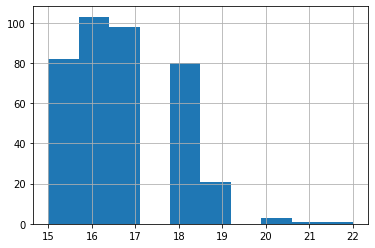

In [9]:
students.age.hist(label = 'возраст ученика')
students.age.describe()

count    361.000000
mean       1.434903
std        0.692660
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        4.000000
Name: traveltime, dtype: float64

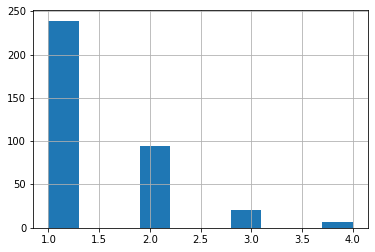

In [10]:
students.traveltime.hist(label = 'время в пути до школы')
students.traveltime.describe()

count    382.000000
mean       2.036649
std        0.847239
min        1.000000
25%        1.000000
50%        2.000000
75%        2.000000
max        4.000000
Name: studytime, dtype: float64

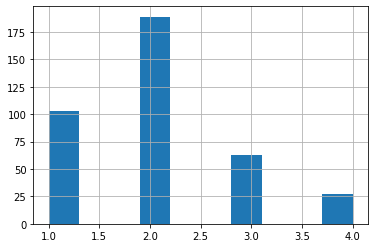

In [11]:
students.studytime.hist(label = 'время на учёбу помимо школы в неделю')
students.studytime.describe()

count    367.000000
mean       0.326975
std        0.729479
min        0.000000
25%        0.000000
50%        0.000000
75%        0.000000
max        3.000000
Name: failures, dtype: float64

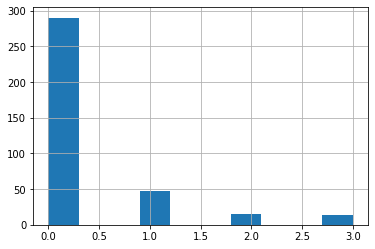

In [12]:
students.failures.hist(label = 'количество внеучебных неудач')
students.failures.describe()

count    362.000000
mean       3.930939
std        0.931554
min       -1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: famrel, dtype: float64

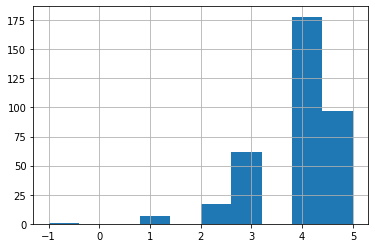

In [13]:
students.famrel.hist(label = 'семейные отношения')
students.famrel.describe()

-1 - выброс. делаем = 1

In [14]:
students.famrel = students.famrel.apply(lambda x: 1 if x < 1 else x)

count    380.000000
mean       3.223684
std        0.993364
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: freetime, dtype: float64

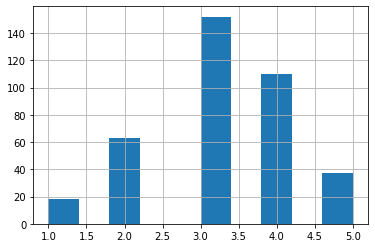

In [15]:
students.freetime.hist(label = 'свободное время после школы')
students.freetime.describe()

count    382.000000
mean       3.094241
std        1.116104
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: goout, dtype: float64

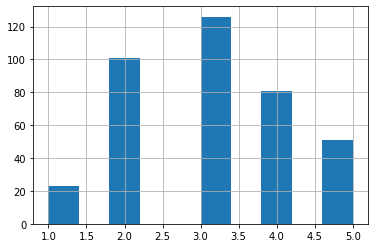

In [16]:
students.goout.hist(label = 'проведение времени с друзьями')
students.goout.describe()

count    374.000000
mean       3.529412
std        1.402006
min        1.000000
25%        3.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: health, dtype: float64

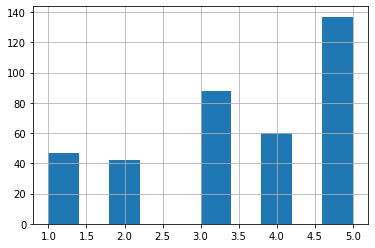

In [17]:
students.health.hist(label = 'текущее состояние здоровья')
students.health.describe()

count    378.000000
mean       7.320106
std       23.615525
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

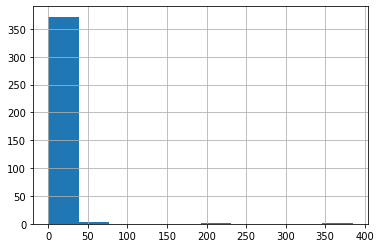

In [18]:
students.absences.hist(label = 'количество пропущенных занятий')
students.absences.describe()

Уберем выбросы

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


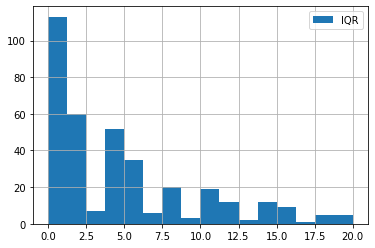

In [19]:
median = students.absences.median()
IQR = students.absences.quantile(0.75) - students.absences.quantile(0.25)
perc25 = students.absences.quantile(0.25)
perc75 = students.absences.quantile(0.75)
print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
      , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
students.absences=students.absences.loc[students.absences.between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)]
students.absences.hist(bins = 16, label = 'IQR')
# students.absences.loc[students.absences <= 100].hist(alpha = 0.5, bins = 16, range = (40, 100), label = 'Здравый смысл')
plt.legend();

count    361.000000
mean       4.609418
std        4.989413
min        0.000000
25%        0.000000
50%        4.000000
75%        7.000000
max       20.000000
Name: absences, dtype: float64

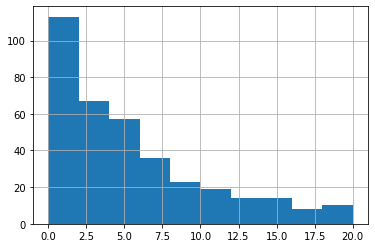

In [20]:
students.absences.hist(label = 'количество пропущенных занятий')
students.absences.describe()

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

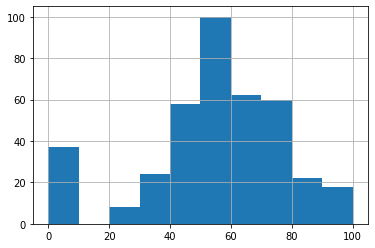

In [21]:
students.score.hist(label = ' баллы по госэкзамену по математике')
students.score.describe()

In [22]:
display(students.head(10))
students.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,None,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,None,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,None,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,None,no,yes,-6.0,yes,yes,None,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,None,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,None,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,None,None,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   famsize              362 non-null    object 
 5   Pstatus              344 non-null    object 
 6   Medu                 386 non-null    float64
 7   Fedu                 365 non-null    float64
 8   Mjob                 370 non-null    object 
 9   Fjob                 353 non-null    object 
 10  reason               372 non-null    object 
 11  guardian             358 non-null    object 
 12  traveltime           361 non-null    float64
 13  studytime            382 non-null    float64
 14  failures             367 non-null    float64
 15  schoolsup            380 non-null    obj

Образование матери

count    386.000000
mean       2.766839
std        1.094277
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: Medu, dtype: float64

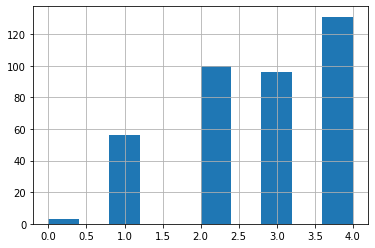

In [23]:
students.Medu.hist(label = 'Образование матери')
students.Medu.describe()

Образование отца

count    365.000000
mean       2.627397
std        2.241790
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max       40.000000
Name: Fedu, dtype: float64

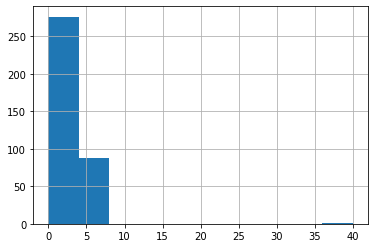

In [24]:
students.Fedu.hist(label = 'Образование отца')
students.Fedu.describe()

Есть выброс на 40, скорее всего это опечатка = 4.0
Все что больше 10 делим на 10

In [25]:
students.Fedu = students.Fedu.apply(lambda x: x/10 if x >= 10 else x)

count    365.000000
mean       2.528767
std        1.088082
min        0.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        4.000000
Name: Fedu, dtype: float64

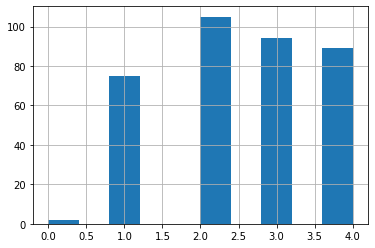

In [26]:
students.Fedu.hist(label = 'Образование отца')
students.Fedu.describe()

Образование. Сводная гистограма

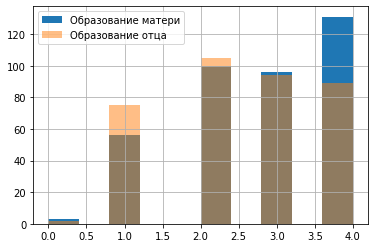

In [27]:
students.Medu.hist(label = 'Образование матери')
students.Fedu.hist(label = 'Образование отца', alpha = 0.5)
students.Medu.describe()
plt.legend()


Анализ номинативных переменных

In [28]:
def get_boxplot(column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score',
                data=students.loc[students.loc[:, column].isin(students.loc[:, column].value_counts().index)],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

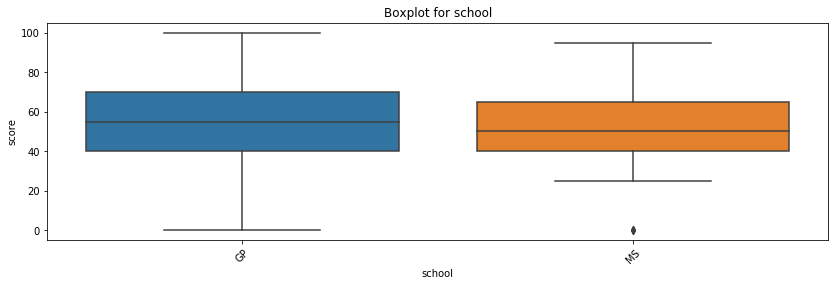

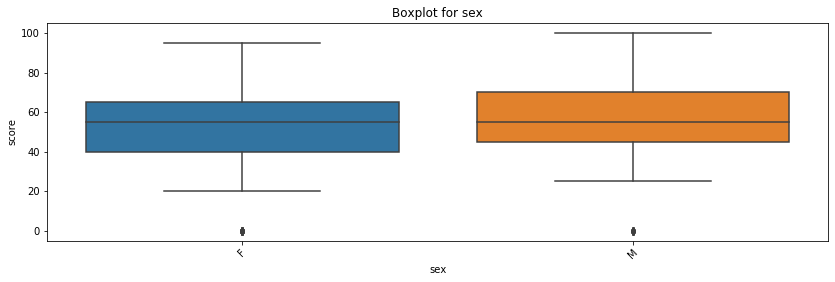

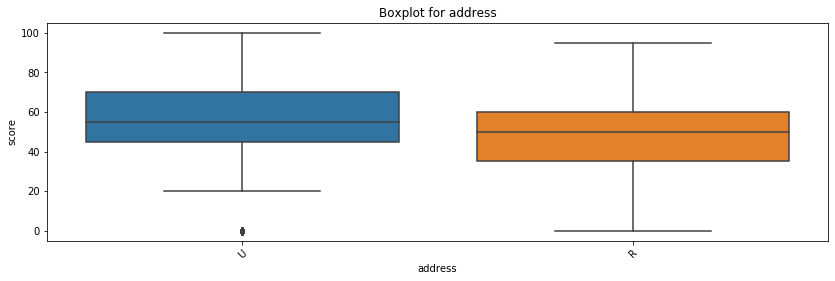

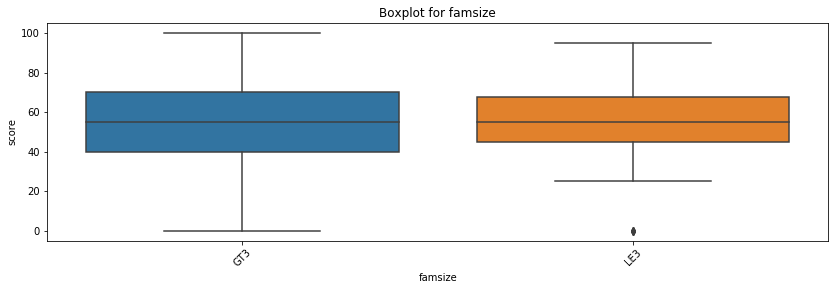

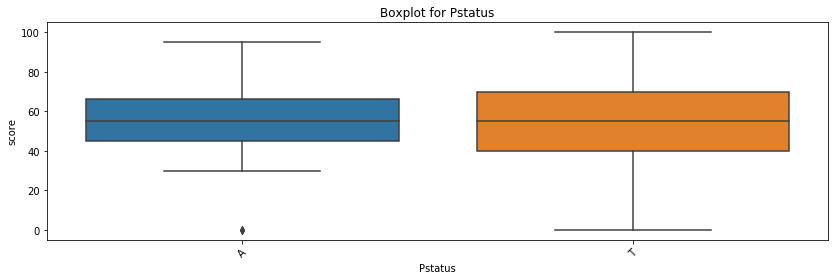

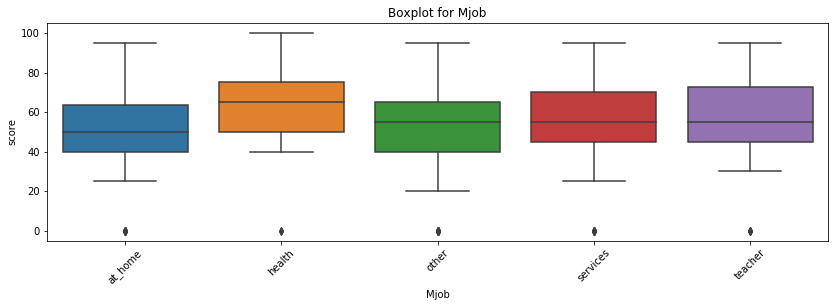

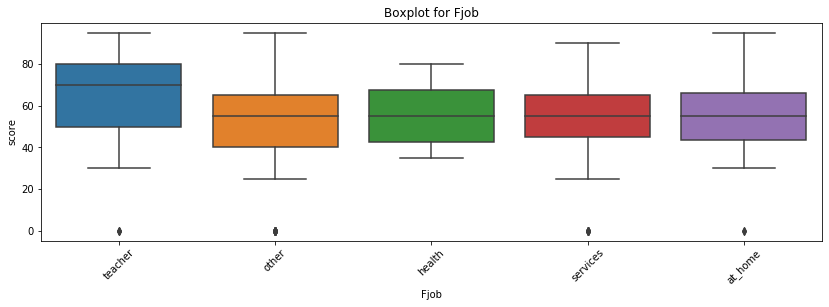

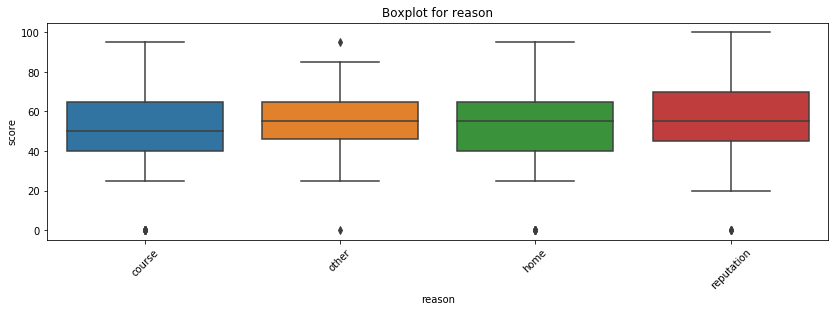

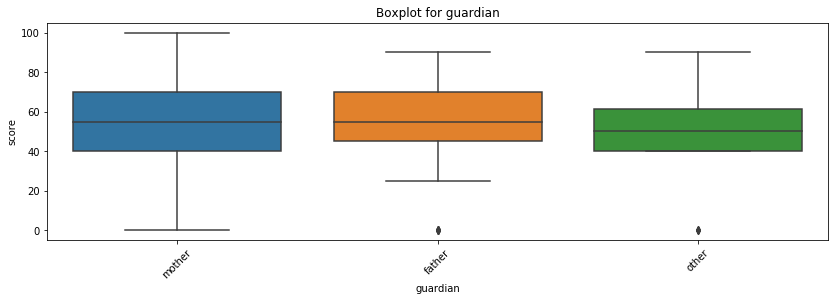

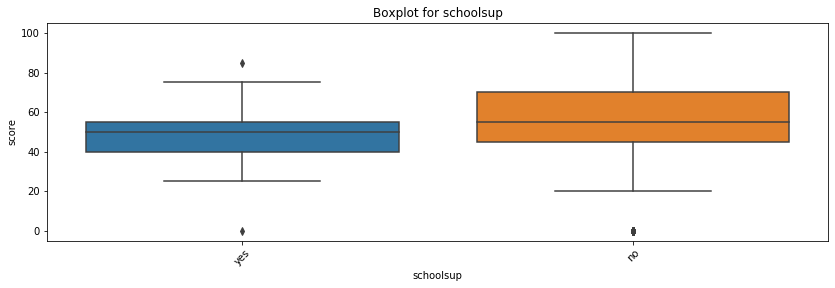

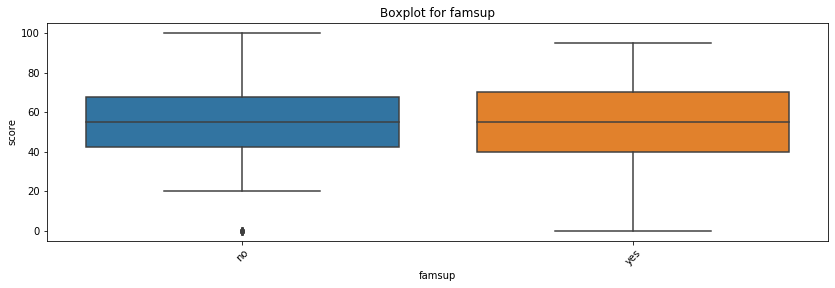

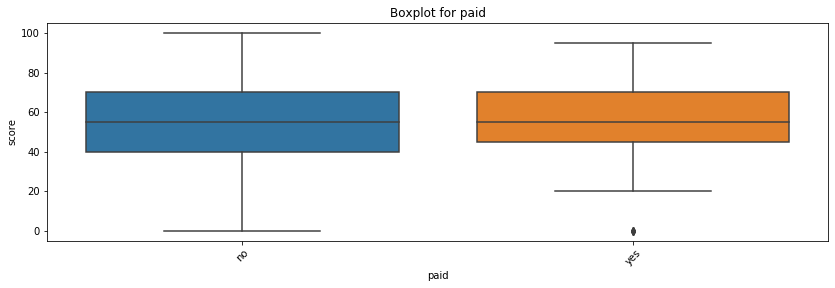

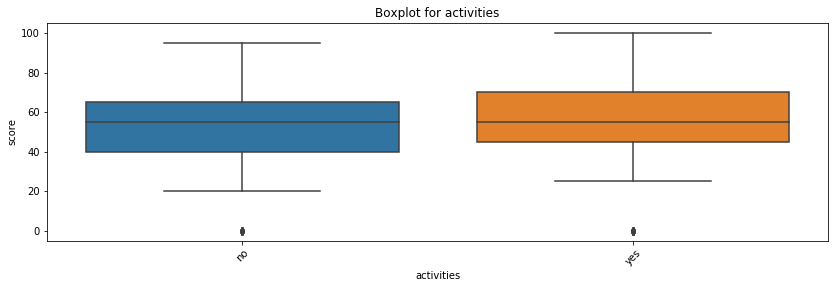

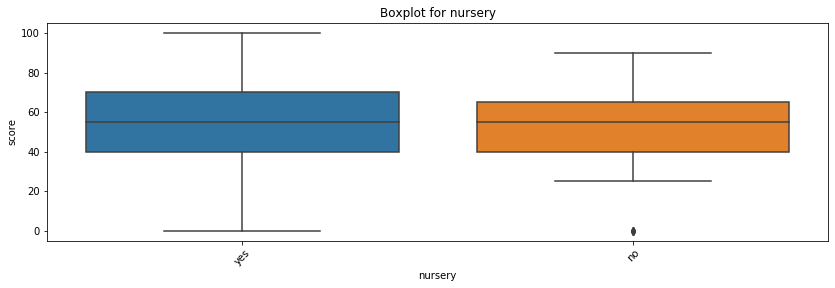

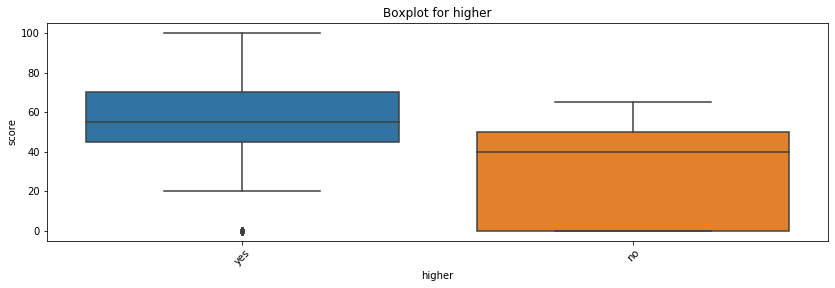

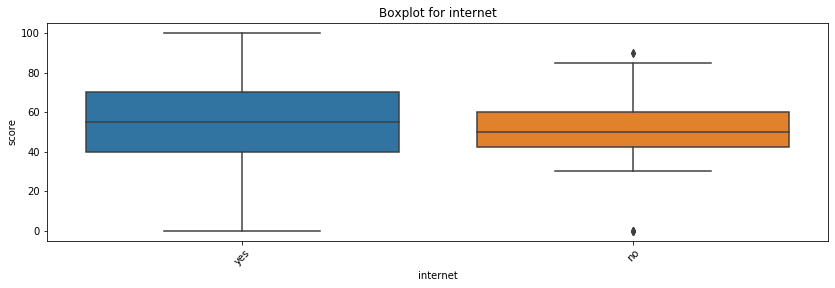

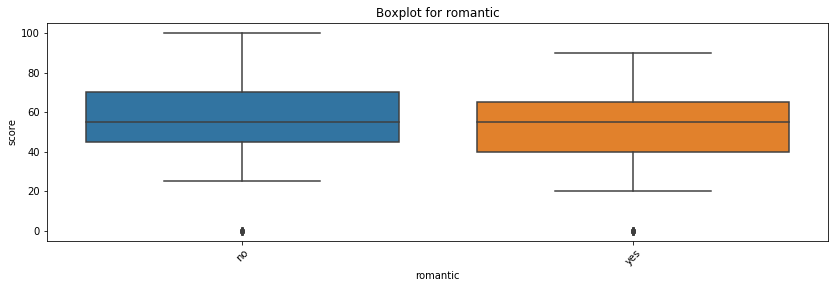

In [29]:
for column_name in students.columns:
    col = students[column_name]
    if col.dtype == 'object':
        get_boxplot(column_name)


Не сильно влияет на оценку:
название школы, пол, причина выбора школы,семейная образовательная поддержка,
 дополнительные платные занятия по математике,

Городские ученики учатся лучше
Размер семьи не сильно влияет
Pstatus  - не сильно влияет
Работа родителей оказывает влияние на оценку

Если опекун не один из родителей, то ученик учится хуже
дополнительная образовательная поддержка ухудшает оценку
дополнительные внеучебные занятия - улучшают оценку
посещал детский сад - улучшает оценку
Желание получить высшее образование очень сильно повышает оценку
наличие интернета дома - тоже повышает оценку
романтические отношения немного мешают учебе

Итого: Городские ученики, у которых родители имеют хорошую работу. Если ученик
посещал детский сад, имеет дома интернет и есть желание получить высшее образование
учатся лучше.

Корреляционный анализ

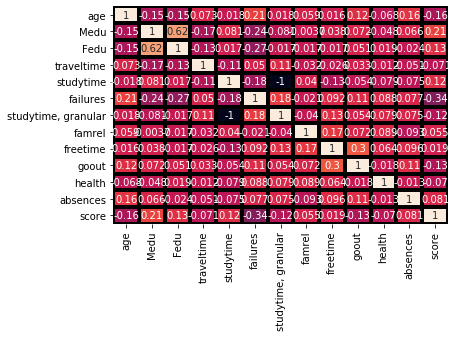

In [30]:
sns.pairplot(students, kind = 'reg')

Используем для наглядности матрицу корреляций:

In [31]:
students.corr()



,age,Medu,Fedu,traveltime,studytime,failures,"studytime, granular",famrel,freetime,goout,health,absences,score
age,1.000000,-0.146736,-0.152148,0.073146,-0.018227,0.205919,0.018227,0.058768,0.016099,0.121115,-0.068103,0.155469,-0.155726
Medu,-0.146736,1.000000,0.621981,-0.165838,0.081032,-0.240319,-0.081032,-0.003697,0.038265,0.072320,-0.048331,0.066439,0.213349
Fedu,-0.152148,0.621981,1.000000,-0.132036,0.017306,-0.273286,-0.017306,-0.016791,-0.017263,0.050997,0.018624,-0.024235,0.130923
traveltime,0.073146,-0.165838,-0.132036,1.000000,-0.105910,0.049738,0.105910,-0.032413,-0.026299,0.032629,-0.011724,-0.050613,-0.070559
studytime,-0.018227,0.081032,0.017306,-0.105910,1.000000,-0.181947,-1.000000,0.039899,-0.125066,-0.053831,-0.079180,-0.075454,0.115741
failures,0.205919,-0.240319,-0.273286,0.049738,-0.181947,1.000000,0.181947,-0.021068,0.091608,0.107747,0.088013,0.076537,-0.344338
"studytime, granular",0.018227,-0.081032,-0.017306,0.105910,-1.000000,0.181947,1.000000,-0.039899,0.125066,0.053831,0.079180,0.075454,-0.115741
famrel,0.058768,-0.003697,-0.016791,-0.032413,0.039899,-0.021068,-0.039899,1.000000,0.171165,0.072291,0.089074,-0.092902,0.055305
freetime,0.016099,0.038265,-0.017263,-0.026299,-0.125066,0.091608,0.125066,0.171165,1.000000,0.296338,0.064315,0.096281,0.019026
goout,0.121115,0.072320,0.050997,0.032629,-0.053831,0.107747,0.053831,0.072291,0.296338,1.000000,-0.018026,0.113048,-0.129685


Видим, что образование матери и отца сильнее всего влияет на успеваемость,
и образрвание матери влияет сильнее, чем отца
Дальность от школы ухудшает успеваемость
Дополнительные часы обучения так же повышают оценку
а вот количество внеучебных неудач наоборот ухудшают успеваемость
Семейные отношения и здоровье немного повышают успеваемость, а проведение времени с друзьями
уменьшают

Данные в целом чистые, присутствуют небольшые выбросы и пропуски по успеваемости

Уберем из датасета параметры, которые слабо влияют на score:

In [32]:
students.drop(["famrel", "absences", "traveltime", "health", 'freetime', 'famsize', 'Pstatus']
              , axis = 1, inplace = True)

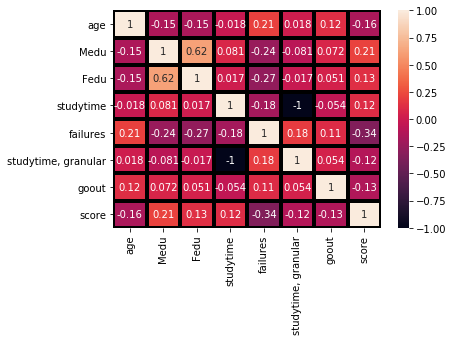

In [33]:
sns.heatmap(students.corr(), annot = True, fmt='.2g', linewidths=3, linecolor='black')

In [34]:
students.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 389 entries, 0 to 394
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               389 non-null    object 
 1   sex                  389 non-null    object 
 2   age                  389 non-null    int64  
 3   address              374 non-null    object 
 4   Medu                 386 non-null    float64
 5   Fedu                 365 non-null    float64
 6   Mjob                 370 non-null    object 
 7   Fjob                 353 non-null    object 
 8   reason               372 non-null    object 
 9   guardian             358 non-null    object 
 10  studytime            382 non-null    float64
 11  failures             367 non-null    float64
 12  schoolsup            380 non-null    object 
 13  famsup               351 non-null    object 
 14  paid                 350 non-null    object 
 15  activities           375 non-null    obj